
+ 자료 불러오기 
+ word cloud
+ nltk.FreqDist
+ 키워드 검색


### import

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

import seaborn as sns

import pymysql
import pandas as pd
import numpy as np

# wordcloud 준비
from wordcloud import WordCloud

from konlpy.tag import Okt
okt = Okt("C:/Program Files/Java/jdk-12.0.1/bin/server/jvm.dll")

import warnings
warnings.filterwarnings("ignore")

In [2]:
def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1

def tokenize(doc):
    result = ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

def tokenize2(doc):
    result = [''.join(t) for t in okt.morphs(doc)] # 말뭉치(명사+ a) ex ['더빙', '나다', ...]
    return result 

def dataframe_to_wc(dataset, stopword):
    df_temp = dataset.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    
    # regex to konlpy
    token_1 = [tokenize(row) for row in df_temp ]  

    data_trim2 = []
    for i in range(len(df_temp)):
        t = ' '.join(token_1[i])
        data_trim2.append(t.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]",""))
    
    df_temp = pd.DataFrame(data_trim2)
    df_temp = df_temp[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

    text = df_temp.to_list()
    text_all = listToString(text)
    
    # worldcloud 생성
    wc = WordCloud(font_path= path, stopwords = stopword, width = 600, height = 600, background_color="white", repeat=True)
    wc.generate(text_all)
    return wc

In [52]:
df_product = pd.read_excel('./CS_PLATFORM_PRODUCT.xlsx','Sheet1')

df_product['PRODUCT_CODE'] = df_product['PRODUCT_CODE'].astype('object')

In [ ]:
select reg_wk, count(*) from ( 
select GROUP_CONCAT( distinct (SELECT concat(  '(', code, ') ' , code_nm) FROM JT_CODE B WHERE A.PRODUCT_CODE = B.CODE AND B.CODE_GRP_ID = 'PRODUCT') SEPARATOR ', ') as "상품명"
        , A.GRADE as "구매자평점" 
        , A.CONTENTS as 리뷰상세내용
        , A.WRITER as "등록자" 
        , (STR_TO_DATE(A.WRITE_DT, '%Y%m%d'))  as 리뷰등록일 
        , DATE_FORMAT(substr(A.WRITE_DT, 1,8), '%Y-%m') as reg_wk 
        , (SELECT CODE_NM FROM JT_CODE B WHERE A.COMPANY_CODE = B.CODE AND B.CODE_GRP_ID = 'DEALER_ID') as 수집체널 
		FROM MAEIL_REVIEW A
		where GRADE in (1,2,3 )
		and A.WRITE_DT between '20210101' and '20210531'
		and A.COMPANY_CODE = '13358'
-- 		and A.PRODUCT_CODE in (106545,106546,105844,105726,105724,105725,106005,106050,106049,106183,105788,105789,105790) /*HMR*/
-- 		and A.PRODUCT_CODE in (105702, 105703,105200,105196,204228,204371,204370)  /* 기타 */
-- 		and A.PRODUCT_CODE in (103977,103776,01556,104976,105477,104461,104410) /* 백색시유 */
-- 		and A.PRODUCT_CODE in (204412,106213,910609,106526,910592,910585,106054,105781,106035,106055,106138,106462,106461,106013,106014,106011,105875,105873,106348,106349,106558,106093,106018,910577,910586,105046,910580,106583,105938) /* 셀렉스 */ 
-- 		and A.PRODUCT_CODE in (105478,106142,105651,106040,103157,105838,103741,103739,103742,103740,106266,106162,105626,105627,105328,104651,103622,103621,104650,104649,103623,105568,105567,104836,104839,104841,104832,104834,104837,104833,104835,105623,105621,105622) /* 영양식기티 */
-- 		and A.PRODUCT_CODE in (106308,106309,106577,101348,105581,105835,105834,105889,105664,101557,101558,106521,106185,105590,104871,106343,106467,106412,106411) /* 유가공기티 */
-- 		and A.PRODUCT_CODE in (105535,104307,105717,105858,104048,104050,105718,104401,104400,104657,106561,106560,204455) /* 기타음료*/
-- 		and A.PRODUCT_CODE in (106284,106283,105016,105015,105014,104215,104213,105059,105058,105057,104161,104183,104182,104181,104180,106277,106276,106275,104200,104199,105486,204341,204339) /* 조제분유*/
-- 		and A.PRODUCT_CODE in (105523,104861,105099,103093,103103,106554,103098,105672) /* 치즈 */
-- 		and A.PRODUCT_CODE in (105463,106187,106188,104467,103031,101690,101521,104645,106101,101522,104869,103633,105719) /* 커피 */
-- 		and A.PRODUCT_CODE in (105645,104412,103963,103962,103965,103964,105809,104413) /* 아몬드밀크 */
		and A.PRODUCT_CODE in (204359,202749,202748,204334,204193,203634,203635,204194,204361,201827,201826,201831,204360,203736,203789) /* 페레로 */
-- 		and A.PRODUCT_CODE in (105695,105696,106007,105990,105989,103790,105340,106463,103365,103364,103474,105385,103791,106066,910605,910627,106295,106298) /* 상하목장 */
-- 		and A.PRODUCT_CODE in (910587,101352,104152,104150,101600,106551,105644,104155,104154,103273)  /*두유*/
		group by A.COMPANY_CODE, A.WRITER, A.CONTENTS, A.WRITE_DT, A.GRADE, A.PRODUCT_NO
		order by A.COMPANY_CODE, A.GRADE desc
)a group by reg_wk order by reg_wk asc 
;


In [4]:
# DB연결
conn = pymysql.connect(host = '**.***.*.*', user ='__USER_ID__', password = "__PASSWORD__", database='__DATABASE__')

# cursor 설정
cursor = conn.cursor(pymysql.cursors.DictCursor)

In [137]:
# 제품리뷰
sql= '''select reg_wk
        , (case when 상품명 like '%아몬드%'		then '아몬드우유' 
                when 상품명 like '%두유%'		then '두유' 
                when 상품명 like '%분유%'		then '분유' 
                when 상품명 like '%멸균 매일%'	then '우유' 
                when 상품명 like '%멸균 소잘%'	then '우유' 
                when 상품명 like '%우유속에%'	then '유가공기타' 
                when 상품명 like '%허쉬%'		then '유가공기타' 
                when 상품명 like '%바하%'		then '유가공기타' 
                when 상품명 like '%바이오%'		then '유가공기타' 
                when 상품명 like '%골든밀크%'	then '유가공기타' 
                when 상품명 like '%멸균 상하%'	then '상하목장' 
                when 상품명 like '%얼려먹는%'	then '상하목장' 
                when 상품명 like '%상하목장%'	then '상하목장' 
                when 상품명 like '%맘마밀%'		then '이유식' 
                when 상품명 like '%요미%'		then '이유식' 
                when 상품명 like '%파스타소스%'	then 'HMR' 
                when 상품명 like '%스프%'		then 'HMR' 
                when 상품명 like '%카레%'		then 'HMR' 
                when 상품명 like '%브리또%'		then 'HMR' 
                when 상품명 like '%셀렉스%'		then '셀렉스' 
                when 상품명 like '%코어프로틴%'	then '셀렉스' 
                when 상품명 like '%썬업%'		then '주스' 
                when 상품명 like '%바리스타룰스%'	then '커피' 
                when 상품명 like '%치즈%'		then '치즈' 
                when 상품명 like '%페레로%'		then '페레로' 
                when 상품명 like '%데르뜨%'		then '기타' 
           else null end) as "category"
        , 상품명
        , 구매자평점
        , 리뷰상세내용
        from (
            select PRODUCT_NO as "상품번호"
            , A.PRODUCT_CODE   
            , GROUP_CONCAT( distinct (SELECT concat(  '(', code, ') ' , code_nm) FROM JT_CODE B WHERE A.PRODUCT_CODE = B.CODE AND B.CODE_GRP_ID = 'PRODUCT') SEPARATOR ', ') as "상품명"
            , A.GRADE as "구매자평점" 
            , A.CONTENTS as 리뷰상세내용
            , A.WRITER as "등록자" 
            , (STR_TO_DATE(A.WRITE_DT, '%Y%m%d'))  as 리뷰등록일 
            , DATE_FORMAT(substr(A.WRITE_DT, 1,8), '%Y-%U') as reg_wk 
            , (SELECT CODE_NM FROM JT_CODE B WHERE A.COMPANY_CODE = B.CODE AND B.CODE_GRP_ID = 'DEALER_ID') as 수집체널 
            FROM MAEIL_REVIEW A
            where GRADE in (1,2)
            and A.WRITE_DT > '20210102'
            and A.PRODUCT_CODE  not like 'G_%'
            group by A.PRODUCT_CODE ,A.COMPANY_CODE, A.WRITER, A.CONTENTS, A.WRITE_DT, A.GRADE, A.PRODUCT_NO
            order by A.COMPANY_CODE, A.GRADE desc) A
        '''
cursor.execute(sql)
trend_review = cursor.fetchall()
trend_review = pd.DataFrame(trend_review)
# trend_review['리뷰등록일'] = pd.to_datetime(trend_review['리뷰등록일'])
# trend_review['PRODUCT_CODE'] =trend_review['상품명'].str[1:7]

In [139]:
trend_review.groupby('category')['reg_wk'].count().T
# trend_review = trend_review[trend_review['reg_wk']== '2021-25']

category
HMR      122
기타        52
두유       102
분유       102
상하목장     203
셀렉스      176
아몬드우유    207
우유       218
유가공기타     77
이유식       82
주스        35
치즈        25
커피        41
페레로       35
Name: reg_wk, dtype: int64

In [205]:
trend_review2 = trend_review[trend_review['category']== '아몬드우유']

In [211]:
trend_review2 = trend_review2[trend_review2['reg_wk']== '2021-25']

In [212]:
# trend_review2.tail()

In [213]:
token_data1 = [tokenize(row) for row in trend_review2['리뷰상세내용'] ]  

# 2차 가공 : 역토큰화 후, 한글만 남김
data_trim2 = []
for i in range(len(trend_review2)):
    t = ' '.join(token_data1[i])
    data_trim2.append(t)

trend_review2['리뷰상세내용2'] = data_trim2
trend_review2['리뷰상세내용2'] = trend_review2['리뷰상세내용2'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [214]:
#Text 일부 조정
trend_review2['리뷰상세내용2'] = trend_review2['리뷰상세내용2'].str.replace('셀 렉스', '셀렉스')
trend_review2['리뷰상세내용2'] = trend_review2['리뷰상세내용2'].replace('달 지', '달다')

In [215]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = trend_review2['리뷰상세내용2'].to_list()
vect = CountVectorizer().fit(corpus)
count = vect.transform(docs).toarray().sum(axis=0)
idx = np.argsort(-count)
# review_cnt = count[idx]
tfidv = TfidfVectorizer().fit(corpus)
tfidv.transform(corpus).toarray()

review_dic = np.array(vect.get_feature_names())[idx]
review_cnt = vect.transform(corpus).toarray().sum(axis=0)
review_cnt_adj = tfidv.transform(corpus).toarray().sum(axis=0)

trend_review_corpus = pd.DataFrame()
trend_review_corpus['word']  = review_dic
trend_review_corpus['count'] = review_cnt
trend_review_corpus['count_adj'] = review_cnt_adj

In [216]:
trend_review_corpus.sort_values(by=['count_adj'], ascending=False).head(30)

,word,count,count_adj
37,녹다,2,0.523037
8,불안하다,2,0.457439
0,ㅈㅐ,1,0.388614
36,물이,1,0.388614
17,유통,1,0.388614
33,따뜻하다,1,0.388614
27,냉장,1,0.388614
14,처음,1,0.388614
31,도착,2,0.383178
4,써주다,2,0.383178


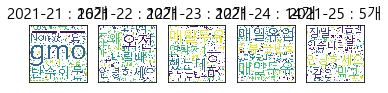

In [27]:
###############
# import 
#####

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

from konlpy.tag import Okt
okt = Okt("C:/Program Files/Java/jdk-12.0.1/bin/server/jvm.dll")

from wordcloud import WordCloud
import pandas as pd

def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1

###############
# WC 가공 : 최근 5주
#####

list_gubun = list(dataset.reg_wk.drop_duplicates())
list_gubun = sorted(list_gubun)[-5:]
plt.figure(figsize=(16, 6))

for df_filter in list_gubun:
    df_temp = pd.DataFrame()
    df_temp['내용'] = dataset[dataset['reg_wk']==df_filter]['CNTS'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

    text = df_temp['내용'].to_list()
    text_all = listToString(text)
    
    word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
             '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
             '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
             '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
             '도', '임시', '이미지', '확인', '후', '을', '안' ,'되다', '하', '심', '고객', '님', '부탁드리다',
             '두유', '언제', '상품', '남다', '까지', '일', '로', '한' ,'일', '로', '인가요','발송'
            ]

    # worldcloud 생성
    wc = WordCloud(font_path= path, stopwords = word1, width = 600, height = 600, background_color="white", repeat=True)
    wc.generate(text_all)

    j = list_gubun.index(df_filter)+1
    plt.subplot(1,5,j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wc, cmap=plt.cm.binary)
#     plt.title(df_filter +' : '+ str(len(df_temp)) + '개' ,fontsize=15)

plt.show()

In [7]:
stopword = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
         '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
         '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
         '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
         '도', '임시', '이미지', '확인', '후', '을', '안' ,'되다', '하', '심', '고객', '님'
         ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


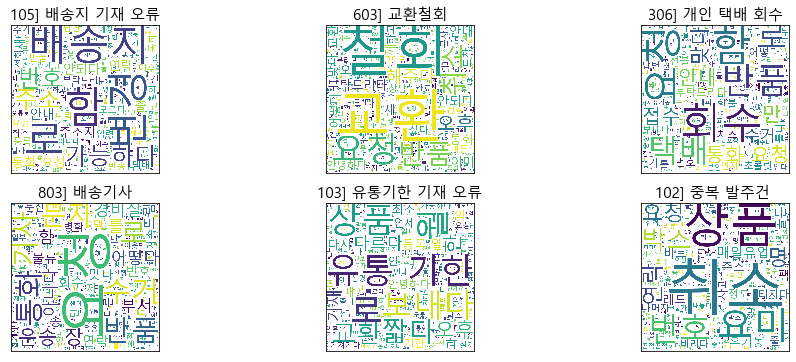

In [94]:
list_gubun = list(trend_csGUBUN.GUBUN.tail(6))

plt.figure(figsize=(16, 6))
for df_filter in list_gubun:
    df_temp = pd.DataFrame()
    df_temp['내용'] = trend[trend['GUBUN']==df_filter]['CNTS'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    token_data1 = [tokenize(row) for row in df_temp['내용'] ]  

    # 2차 가공 : 역토큰화 후, 한글만 남김
    data_trim2 = []
    for i in range(len(df_temp)):
        t = ' '.join(token_data1[i])
        data_trim2.append(t)

    df_temp['내용'] = data_trim2
    df_temp['내용'] = df_temp['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

    text = df_temp['내용'].to_list()
    text_all = listToString(text)
    
    word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
             '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
             '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
             '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
             '도', '임시', '이미지', '확인', '후', '을', '안' ,'되다', '하', '심', '고객', '님'
            ]

    # worldcloud 생성
    wc = WordCloud(font_path= path, stopwords = word1, width = 600, height = 600, background_color="white", repeat=True)
    wc.generate(text_all)

    j = list_gubun.index(df_filter)+1
    plt.subplot(2,3,j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wc, cmap=plt.cm.binary)
    plt.title(df_filter,fontsize=15)

plt.show()

In [63]:
trend_review

,상품번호,상품명,구매자평점,리뷰상세내용,등록자,리뷰등록일,reg_wk,수집체널
0,None,(104154) 멸균 매일두유 [ 99.89 ] [ 190ml ],3,잘받았습니다\r\n배송 괜찮아요!,^*,2021-02-24,2021-08,25 카카오 톡스토어(20.12.2~미사용)
1,None,(104154) 멸균 매일두유 [ 99.89 ] [ 190ml ],3,친구추천으로 주문했습니다 완전 찐한 두유맛은 아니고 적당해서 마시기 좋습니다.. 재...,^*,2021-02-24,2021-08,25 카카오 톡스토어(20.12.2~미사용)
2,54303233,(105645) 멸균 아몬드브리즈 [ 프로틴 ] [ 190ml ],3,칼로리가 낮아 좋아요\r\n배송 괜찮아요!,^*,2021-05-13,2021-19,25 카카오 톡스토어(20.12.2~미사용)
3,None,(105645) 멸균 아몬드브리즈 [ 프로틴 ] [ 190ml ],3,조금 진한맛이였으면 싶네요..\r\n배송 괜찮아요!,^~*,2021-01-14,2021-02,25 카카오 톡스토어(20.12.2~미사용)
4,54303233,(105645) 멸균 아몬드브리즈 [ 프로틴 ] [ 190ml ],3,다이어트에 도움이 될까하고 구매했어요~^^\r\n옵션 프로틴 190ml 24팩 X 2박스,?*,2021-06-12,2021-23,25 카카오 톡스토어(20.12.2~미사용)
...,...,...,...,...,...,...,...,...
8931,None,(106018) 셀렉스 코어프로틴플러스 [ 304g ],1,일처리가 깔끔한지 않아서 리뷰는 다음 기회로 미루도록 하겠습니다 이상,terracan34,2021-03-26,2021-12,26 셀렉스 몰
8932,None,(105939) 셀렉스 프로틴바 [ 베리 ] [ 30g ],1,우리 가족 입맛에는 안맞아요\n웬지 고생해서 만들었는데 안타깝네요\n날짜가 길어서 ...,ucity,2021-02-27,2021-08,26 셀렉스 몰
8933,None,(106348) 멸균 셀렉스 음료 [ 오리지널 ] [ 125ML ],1,우리가족 입맛에는 안맞네요 \n고생해서 만드셨을텐데 안타깝네요\n유통기한이 길어 안...,ucity,2021-02-27,2021-08,26 셀렉스 몰
8934,None,(106213) 셀렉스 밀크세라마이드 [ 요거트맛 ] [ 2.7G X 28 ],1,진짜 맛없는데 왜 맛있다고들할까...진짜 입맛차이가 큰건가...리뷰전에 썼던거같은데..,wert1029,2021-03-03,2021-09,26 셀렉스 몰


In [65]:
trend_review.groupby('수집체널')['구매자평점'].count()

수집체널
1 쿠팡                         137
10 위메프                        74
15 맘큐                         17
2 11번가                       843
25 카카오 톡스토어(20.12.2~미사용)     358
26 셀렉스 몰                      49
3 네이버                       7341
4 SSG닷컴                      117
Name: 구매자평점, dtype: int64

In [ ]:
select reg_wk, count(*) from ( 
select GROUP_CONCAT( distinct (SELECT concat(  '(', code, ') ' , code_nm) FROM JT_CODE B WHERE A.PRODUCT_CODE = B.CODE AND B.CODE_GRP_ID = 'PRODUCT') SEPARATOR ', ') as "상품명"
        , A.GRADE as "구매자평점" 
        , A.CONTENTS as 리뷰상세내용
        , A.WRITER as "등록자" 
        , (STR_TO_DATE(A.WRITE_DT, '%Y%m%d'))  as 리뷰등록일 
        , DATE_FORMAT(substr(A.WRITE_DT, 1,8), '%Y-%m') as reg_wk 
        , (SELECT CODE_NM FROM JT_CODE B WHERE A.COMPANY_CODE = B.CODE AND B.CODE_GRP_ID = 'DEALER_ID') as 수집체널 
		FROM MAEIL_REVIEW A
		where GRADE in (1,2,3 )
		and A.WRITE_DT between '20210101' and '20210531'
		and A.COMPANY_CODE = '13358'
-- 		and A.PRODUCT_CODE in (106545,106546,105844,105726,105724,105725,106005,106050,106049,106183,105788,105789,105790) /*HMR*/
-- 		and A.PRODUCT_CODE in (105702, 105703,105200,105196,204228,204371,204370)  /* 기타 */
-- 		and A.PRODUCT_CODE in (103977,103776,01556,104976,105477,104461,104410) /* 백색시유 */
-- 		and A.PRODUCT_CODE in (204412,106213,910609,106526,910592,910585,106054,105781,106035,106055,106138,106462,106461,106013,106014,106011,105875,105873,106348,106349,106558,106093,106018,910577,910586,105046,910580,106583,105938) /* 셀렉스 */ 
-- 		and A.PRODUCT_CODE in (105478,106142,105651,106040,103157,105838,103741,103739,103742,103740,106266,106162,105626,105627,105328,104651,103622,103621,104650,104649,103623,105568,105567,104836,104839,104841,104832,104834,104837,104833,104835,105623,105621,105622) /* 영양식기티 */
-- 		and A.PRODUCT_CODE in (106308,106309,106577,101348,105581,105835,105834,105889,105664,101557,101558,106521,106185,105590,104871,106343,106467,106412,106411) /* 유가공기티 */
-- 		and A.PRODUCT_CODE in (105535,104307,105717,105858,104048,104050,105718,104401,104400,104657,106561,106560,204455) /* 기타음료*/
-- 		and A.PRODUCT_CODE in (106284,106283,105016,105015,105014,104215,104213,105059,105058,105057,104161,104183,104182,104181,104180,106277,106276,106275,104200,104199,105486,204341,204339) /* 조제분유*/
-- 		and A.PRODUCT_CODE in (105523,104861,105099,103093,103103,106554,103098,105672) /* 치즈 */
-- 		and A.PRODUCT_CODE in (105463,106187,106188,104467,103031,101690,101521,104645,106101,101522,104869,103633,105719) /* 커피 */
-- 		and A.PRODUCT_CODE in (105645,104412,103963,103962,103965,103964,105809,104413) /* 아몬드밀크 */
		and A.PRODUCT_CODE in (204359,202749,202748,204334,204193,203634,203635,204194,204361,201827,201826,201831,204360,203736,203789) /* 페레로 */
-- 		and A.PRODUCT_CODE in (105695,105696,106007,105990,105989,103790,105340,106463,103365,103364,103474,105385,103791,106066,910605,910627,106295,106298) /* 상하목장 */
-- 		and A.PRODUCT_CODE in (910587,101352,104152,104150,101600,106551,105644,104155,104154,103273)  /*두유*/
		group by A.COMPANY_CODE, A.WRITER, A.CONTENTS, A.WRITE_DT, A.GRADE, A.PRODUCT_NO
		order by A.COMPANY_CODE, A.GRADE desc
)a group by reg_wk order by reg_wk asc 
;


In [15]:
# DB연결
conn = pymysql.connect(host = '10.223.7.4', user ='MAEIL_CS', password = "Maeil01!@", database='MAEIL_CS')

# cursor 설정
cursor = conn.cursor(pymysql.cursors.DictCursor)

In [ ]:
# 쿼리실행
sql= '''select DATE_FORMAT(substr(INS_DM, 1,8), '%Y/%m/%d') as reg_dtm
        , DATE_FORMAT(substr(INS_DM, 1,8), '%Y-%U') as reg_wk
        , (select CODE_nm from JT_CODE jc where jc.code = mc.DEALER_ID and jc.CODE_GRP_ID = 'DEALER_ID' ) as channel
        , (select CODE_nm from JT_CODE jc where jc.code = mc.CS_GUBUN and jc.CODE_GRP_ID = 'CS_GUBUN' ) as GUBUN
        , (select jc.code_nm from JT_CODE jc where jc.CODE_GRP_ID  ='PRODUCT' and jc.code = substr(mc.PRODUCT_CODE,1,6) ) as product_name
        , (case when mc.REGISTER_ID = 'SYSTEM' then 'ON-LINE' else 'OFF-LINE' end) as "where"
        , CNTS
        from MAEIL_CS mc
        where CS_GUBUN = '701'
        and PRODUCT_CODE > 0
        and DATE_FORMAT(substr(INS_DM, 1,8), '%Y-%U') between '2021-01' and '2021-25'
        and PRODUCT_CODE in (910587,101352,104152,104150,101600,106551,105644,104155,104154,103273)
        '''
cursor.execute(sql)
trend = cursor.fetchall()
trend = pd.DataFrame(trend)
trend['reg_dtm'] = pd.to_datetime(trend['reg_dtm'])

In [ ]:
trend.tail(5)

In [20]:
list_gubun = list(trend.reg_wk.drop_duplicates())

list_gubun = sorted(list_gubun)[-5:]

In [25]:
list_gubun

['2021-16', '2021-17', '2021-18', '2021-19', '2021-20']

ValueError: num must be 1 <= num <= 25, not 26

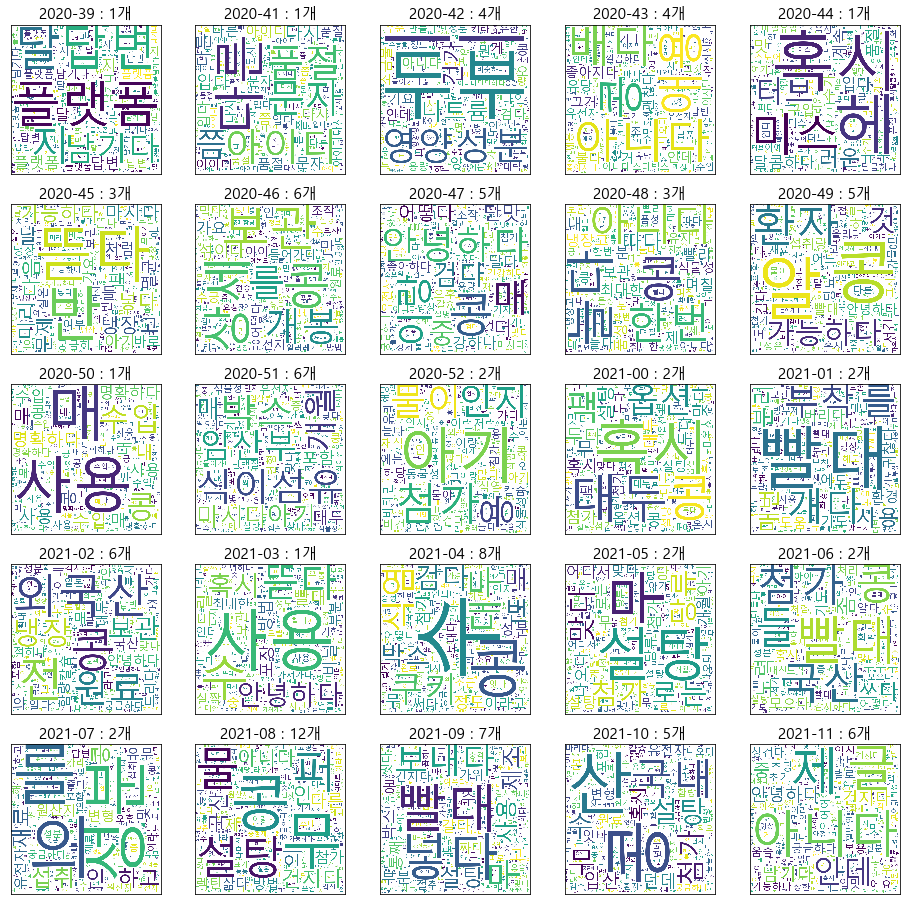

In [20]:
plt.figure(figsize=(16, 16))
for df_filter in list_gubun:
    df_temp = pd.DataFrame()
    df_temp['내용'] = trend[trend['reg_wk']==df_filter]['CNTS'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    token_data1 = [tokenize(row) for row in df_temp['내용'] ]  

    # 2차 가공 : 역토큰화 후, 한글만 남김
    data_trim2 = []
    for i in range(len(df_temp)):
        t = ' '.join(token_data1[i])
        data_trim2.append(t)

    df_temp['내용'] = data_trim2
    df_temp['내용'] = df_temp['내용'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

    text = df_temp['내용'].to_list()
    text_all = listToString(text)
    
    word1 = ['먹다', '하다', '좋다'  , '예요', '이에요', '있다', '맛있다', '같다', '없다', '보통', '최고', '주문', '보다', '매일',
             '구매', '에서', '먹이다', '않다', '자다'  , '들다', '사다'  , '되다', '으로', 'ㅠㅠ', 'ㅜㅜ', '말다', '이다', '받다',
             '아직', '이다', '보이다', '이나', '오다'  , '이라', '우유'  , '배달', '배송', '가정', '제품', '신청', '문의', '되어다',
             '넘다', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅎㅎ', '진짜'  , '너무', '이', '는', '요', '은', '에', '기', '다', '도', '원', '구', '개', '랑','가',
             '도', '임시', '이미지', '확인', '후', '을', '안' ,'되다', '하', '심', '고객', '님', '부탁드리다',
             '두유', '언제', '상품', '남다', '까지', '일', '로', '한' ,'일', '로', '인가요','발송'
            ]

    # worldcloud 생성
    wc = WordCloud(font_path= path, stopwords = word1, width = 600, height = 600, background_color="white", repeat=True)
    wc.generate(text_all)

    j = list_gubun.index(df_filter)+1
    plt.subplot(5,5,j)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wc, cmap=plt.cm.binary)
    plt.title(df_filter +' : '+ str(len(df_temp)) + '개' ,fontsize=15)

plt.show()

In [124]:
df_temp = pd.DataFrame()
df_temp['내용'] = trend['CNTS'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
token_data1 = [tokenize(row) for row in df_temp['내용'] ]  

In [120]:
# 2차 가공 : 역토큰화 후, 한글만 남김
data_trim2 = []
for i in range(len(df_temp)):
    t = ','.join(token_data1[i])
    data_trim2.append(t)

In [125]:
# data_trim2

In [126]:
import itertools
list4 = list(itertools.chain(*token_data1))

In [127]:
text_all2 = text_all.replace(' ', ',')

In [128]:
list5 = [item.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") for item in list4]

In [129]:
# df_temp.head()

In [130]:
import nltk
ko = nltk.Text(list5)

In [131]:
ko

<Text: 신랑/Noun 이/Josa 아침/Noun 마다/Josa 먹다/Verb 하다/Verb 사다/Verb 생각/Noun...>

In [132]:
data = ko.vocab().items()

In [133]:
df_1 = pd.DataFrame.from_dict(data)

In [142]:
df_1 = df_1.sort_values([1], ascending=False)

In [154]:
df_1[0]

5             하다/Verb
16      ./Punctuation
148     ?/Punctuation
1              이/Josa
116           배송/Noun
            ...      
2890     3000원/Number
2650          금일/Noun
2417          사면/Noun
2419         광명시/Noun
3128    미치다/Adjective
Name: 0, Length: 3129, dtype: object

In [165]:
df_1['속성'] =df_1[0].str.split('/').str[1]
df_1['내용'] =df_1[0].str.split('/').str[0]

In [172]:
df_1[(df_1['속성']!=  'Punctuation') & (df_1['속성']!=  'Josa')& (df_1['속성']!=  'Foreign') ].head(10)

,0,1,속성,내용
5,하다/Verb,785,Verb,하다
116,배송/Noun,380,Noun,배송
99,되다/Verb,301,Verb,되다
124,주문/Noun,265,Noun,주문
263,상품/Noun,223,Noun,상품
353,있다/Adjective,193,Adjective,있다
597,부탁드리다/Adjective,182,Adjective,부탁드리다
303,유통/Noun,176,Noun,유통
304,기한/Noun,167,Noun,기한
80,아몬드/Noun,152,Noun,아몬드


### 주별 이슈내용(Weekly)

In [23]:
# DB연결
conn = pymysql.connect(host = '10.223.7.4', user ='MAEIL_CS', password = "Maeil01!@", database='MAEIL_CS')

# cursor 설정
cursor = conn.cursor(pymysql.cursors.DictCursor)

In [24]:
# 쿼리실행
sql= '''select DATE_FORMAT(substr(INS_DM, 1,8), '%Y-%U') as reg_wk
        , CNTS , CS_GUBUN, PRODUCT_CODE 
        from MAEIL_CS mc
        where DATE_FORMAT(substr(INS_DM, 1,8), '%Y/%m/%d') > '2021/04/01'
        '''
cursor.execute(sql)
df3 = cursor.fetchall()
# result = cursor.fetchmany(200)
df3 = pd.DataFrame(df3)

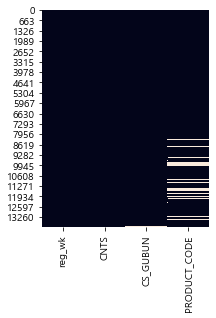

In [36]:
mpl.rc('figure', figsize=(3, 4))
sns.heatmap(df3.isnull(), cbar=False)
plt.show()

In [37]:
df3.tail(10)

,reg_wk,CNTS,CS_GUBUN,PRODUCT_CODE
13911,2021-23,아기가 이 액상 분유 먹을때마다 토를 심하게해요 ㅠㅠ 왜그런가요?,701,105015
13912,2021-23,배송이 아직 안왔는데 배송 완료라고 뜨네요! 확인 부탁드려요~!,None,105645
13913,2021-23,지금 구매해도 틴 트레이 나오나용,None,101348
13914,2021-23,추가6개더준다고하더니 24개만왔네요,None,None
13915,2021-23,택배사가 어디인가요?,None,105789
13916,2021-23,"5월6일 구매하고 1회차 5월 13일(목), 2회차 5월27일(목)에 받았는데 3회...",None,104154
13917,2021-23,37개월 아기가 맛있게 잘먹던데요아이가 먹어도 되나요?아이가 아침대용이나 간식으로 ...,None,106348
13918,2021-23,배송지 변경,None,106526
13919,2021-23,여분의 전용스푼좀 동봉하여 배송해 주새요~^^,None,None
13920,2021-23,주문번호 ; 20210610-0000574입니다.장인어른 선물로 선물용세트 주문했습...,None,None


In [97]:
# for dt_week in list(df3.reg_wk.unique()):
#     temp_date =  dt_week
list(df3.reg_wk.unique())[0]

'2021-14'

In [31]:
df3.CNTS[0].replace('\n', ' ')

'1차 : 셀렉스몰/회원가입오류로 인해 주문안되어서 아이디 확인요청/휴대폰,이름으로 검색하였으나 해당회원이 없다고함/다시 시도해보고 연락준다함 2차 : 셀렉스몰/회원가입이 안되는 이유 알아바달라고함'

In [115]:
# data1['CTT'] = data1['CTT'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

df3[df3['reg_wk'] ==list(df3.reg_wk.unique())[0]]['CNTS'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","").unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


array(['차  셀렉스몰회원가입오류로 인해 주문안되어서 아이디 확인요청휴대폰이름으로 검색하였으나 해당회원이 없다고함다시 시도해보고 연락준다함차  셀렉스몰회원가입이 안되는 이유 알아바달라고함',
       '상담사김지윤인입 재출고된 바리스타 텀블러 송장문의  안내드림 문제있으면 다시 전화준다고함',
       '고객센터로 전화달라는 문의내용을보고 전화주었다고함 현재 해당송장번호  관련내용 말씀해주심 현재 수정쪽에 잔류가되어있는상태이고 대채인력이 배송하다보니 내일까지간다고 확답은못하지만 지금배송하고있다고함 근데 동호수가 기재가 안되어있어서 기사님이 고객님한테 전화해볼예정이라고함 일일 정도 더 소요될수있다고 전달해달라고함 받는분한데 기사가 전화드릴거라고전해달라고함 하루이틀더걸린다고함',
       ...,
       '라이브통해 요거트박스 구매시 명안에는 마스크팩 준다해서 아직 남았다고 지금박스구매하면받는다그래서 박스주문한거 취소하고 박스로 변경햇는데 마스크팩만빼고 왔어요 확인부탁드려요',
       '우유를 소화 못하는 체질이고셀렉스는 부모님것도 함께 주문시켜 먹고 있어요화장실에 심하진 않지만원래 장이 민감해서 자주가는데 셀렉스도 우유를 소화 못하거나 장이 예민한사람들에게부담되는 음료일까요',
       '고객미수긍  ㅁ팩 섭취 후 소금이 들어있는 것처럼 짜다 하시며 항의  ㅁ입맛 주관적인 부분이며 섭취 후 반품 불가 안내 드렸으나 말이 되는 소리를 하라며 소리치며 미수긍 하심  ㅁ반품 가능여부 업체 확인 후 월요일 연락드림 안내'],
      dtype=object)

In [125]:
# 1차 가공 : koNLpy to token
def tokenize(doc):
    result = [t for t in okt.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

token_data1 = [tokenize(row) for row in df3[df3['reg_wk'] ==list(df3.reg_wk.unique())[0]]['CNTS'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","").unique()]  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [133]:
token_data1[0]

[('차', 'Noun'),
 ('셀렉', 'Noun'),
 ('스몰', 'Noun'),
 ('회원', 'Noun'),
 ('가입', 'Noun'),
 ('오류로', 'Noun'),
 ('인하다', 'Adjective'),
 ('주문', 'Noun'),
 ('안되다', 'Adjective'),
 ('아이디', 'Noun'),
 ('확인', 'Noun'),
 ('요청', 'Noun'),
 ('휴대폰', 'Noun'),
 ('이름', 'Noun'),
 ('으로', 'Josa'),
 ('검색', 'Noun'),
 ('하다', 'Verb'),
 ('해당', 'Noun'),
 ('회원', 'Noun'),
 ('이', 'Josa'),
 ('없다', 'Adjective'),
 ('고함', 'Noun'),
 ('다시', 'Noun'),
 ('시도', 'Noun'),
 ('해보다', 'Verb'),
 ('연락', 'Noun'),
 ('주다', 'Verb'),
 ('함차', 'Noun'),
 ('셀렉', 'Noun'),
 ('스몰', 'Noun'),
 ('회원', 'Noun'),
 ('가입', 'Noun'),
 ('이', 'Josa'),
 ('안되다', 'Adjective'),
 ('이유', 'Noun'),
 ('알', 'Noun'),
 ('아바', 'Noun'),
 ('달라', 'Noun'),
 ('고함', 'Noun')]